#03-3. 특성 공학과 규제
목표: 여러 특성을 사용한 다중 회귀에 대해 배우고 사이킷런의 여러 도구를 사용하고, 복잡한 모델의 과대적합을 막기 위한 릿지와 라쏘 회귀 학습하기


---

## 다중 회귀
- 여러 개의 특성을 사용한 선형 회귀
- 선형 회귀는 특성이 1개면 직선(2차원)을, 특성이 2개면 평면(3차원)을 학습
- 2개일 경우 '타깃 = a x 특성1 + b x 특성2 + 절편'


## 문제 #1
- 03-2에서 다항 회귀를 사용해도 여전히 과소 적합 문제 발생
- 해결방법: 농어의 길이 뿐만 아니라 농어의 높이와 두께도 이용하자!

## 특성 공학
- 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
- 이 예제에서는 농어의 특성들을 각각 제곱하여 추가, 각 특성을 서로 곱해서 또 다른 특성으로 사용
- e.g. 농어 길이 x 농어 높이


1. 데이터 준비하기
- 판다스(pandas)는 데이터 분석 라이브러리 일종, 데이터프레임이라는 자료구조 이용

In [38]:
import pandas as pd

# read_csv()로 텍스트 파일을 데이터 프레임으로 생성
df = pd.read_csv('https://bit.ly/perch_csv')

# 데이터 프레임 넘파이 배열로 변환
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

- 타깃 데이터는 기존 방법으로 준비하기

In [39]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

In [40]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

- perch_data와 perch_weight를 훈련 데이터와 테스트 데이터로 분할


## 특성 변환
- 사이컷런의 변환기 클래스는 모두 fit(), transform() 메서드 제공
- 다중 회귀를 위해 PolynomialFeatures 클래스 이용


In [41]:
from sklearn.preprocessing import PolynomialFeatures

#### e.g. 2개의 특성 2와 3으로 이루어진 샘플 하나를 적용해보기
- fit()은 새로웁게 만들 특성 조합을 찾고, transform()은 실제로 데이터를 변환함
- 훈련(fit)을 해야 변환(transform) 가능
- 변환기의 fit()은 입력 데이터만 필요

In [42]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


- 2개의 특성을 가졌던 샘플이 6개의 특성을 가진 샘플로 변환
- 2와 3을 각각 제곱한 4, 9 + 2와 3을 서로 곱한 6이 추가됨
- 1은 선형 방정식의 절편의 계수, 자동으로 절편이 추가됨
- $ 무게 = a \times 길이 + b \times 높이 + c \times 두께 + d \times 1 $

In [43]:
# 절편을 위한 항 제거하기
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


2. 새로운 특성 추가하기

In [44]:
# 훈련 세트 변환
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


- 총 9개의 특성을 가진 샘플이 됨
- get_feature_names_out(): 9개의 특성이 어떤 조합으로 이루어졌는지 알 수 있음

In [45]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [46]:
# 테스트 세트 변환
test_poly = poly.transform(test_input)

3. 다중 회귀 모델 훈련

In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


- '03-2'의 모델보다 훈련 세트 점수가 높아짐
- 특성이 늘어나면 선형 회귀가 더 강력한 것을 확인할 수 있음

In [48]:
print(lr.score(test_poly, test_target))

0.9714559911594111


- 테스트 세트 점수는 더 높아지지 않았지만 이전의 과소적합 문제 해결됨

- 특성을 더 추가하면 어떻게 될까?
- PolynomialFeatures 클래스의 degree 매개변수로 최대 차수 지정 가능

In [49]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


- 최고 차수를 5로 지정하니 특성 개수가 55개로 늘어남

In [50]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [51]:
print(lr.score(test_poly, test_target))

-144.40579436844948


- 특성 개수를 많이 늘리면 훈련 세트에 대해 완벽하게 학습 가능하지만 훈련 세트에 대해 과대적합되므로 테스트 세트 점수가 음수로 나타날 수 있음

## 규제
- 규제: 머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 막는 것 -> 훈련 세트에 대해 과대적합되지 않도록 함
- 선형 회귀 모델의 경우, 특성에 곱해지는 계수의 크기를 작게 함 -> 보편적인 패턴 학습
- 특성의 스케일이 정규화되지 않으면 계수 값의 크기가 공정하게 제어되지 않음
- 규제를 적용하기 전 정규화 필요

In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
# 훈련 세트 정규화 변환
train_scaled = ss.transform(train_poly)
# 테스트 세트 정규화 변환
test_scaled = ss.transform(test_poly)

- 릿지: 계수를 제곱한 값을 기준으로 규제 적용
- 라쏘: 계수의 절댓값을 기준으로 규제 적용

### 릿지 회귀

In [53]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [54]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


- 거의 만점이었던 훈련 세트 점수는 조금 낮아졌지만 테스트 세트 점수는 정상이 됨
- 릿지와 라쏘 모델은 alpha 매개변수로 규제의 강도 조절 가능
- alpha 값이 클수로 규제 강도가 세져 조금 더 과소적합되게 함
- 적절한 alpha 값을 찾기 위해 alpha 값 에 대한 $R^2$ 값의 그래프 그려보기

In [55]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

- alpha 값을 0.001에서 100까지 늘려가며 릿지 회귀 모델을 훈련시킨 뒤 훈련 세트와 테스트 세트 점수를 리스트에 저장해보기


In [56]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델 생성
  ridge = Ridge(alpha = alpha)
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

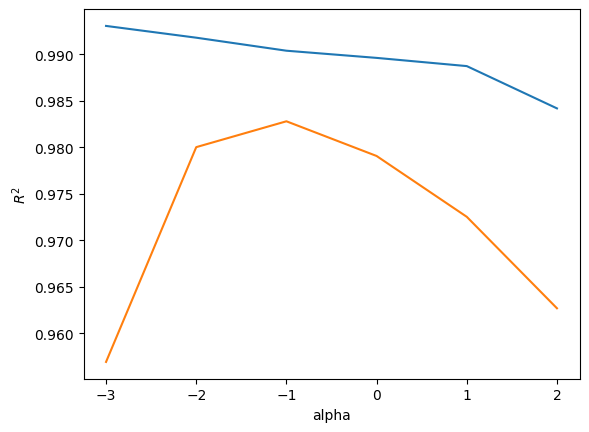

In [57]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.show()

- 위가 훈련 세트, 아래가 테스트 세트 그래프
- 왼쪽: 훈련 세트에 잘 맞고 테스트 세트에 맞지 않는 과대적합 모델
- 오른쪽: 훈련 세트와 테스트 세트 점수 모두 낮아지는 과소적합 모델
- 즉, 가장 적절한 alpha 값은 $10^-1 = 0.1$

In [58]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 회귀


In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


- 라쏘 모델도 alpha 매개변수로 규제의 강도 조절 가능

In [73]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter = 10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


- 라쏘 모델 훈련 시, ConvergenceWarning 발생: 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데 지정한 반복 횟수가 부족할 경우 경고 발생
- max_iter 매개변수 값을 10000으로 지정하여 충분히 늘려주자

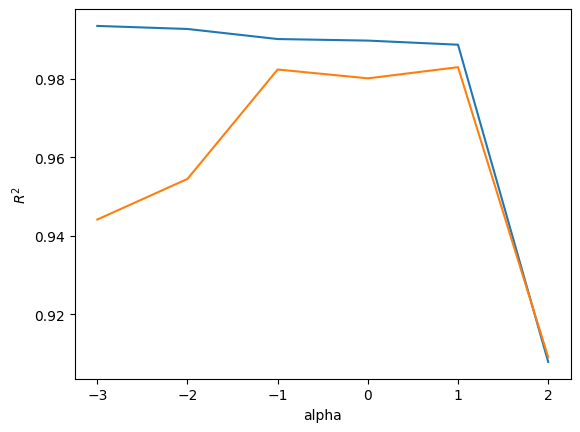

In [72]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('$R^2$')
plt.show()

- 왼쪽은 훈련 점수와 테스트 점수의 큰 차이로 과대적합 모델
- 오른쪽은 훈련 세트와 테스트 점수가 모두 급격히 감소하는 과소적합 모델
- 가장 적절한 alpha 값은 $10^1 = 10$

In [62]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


- 라쏘 모델은 계수를 0으로 만들 수 있음

In [63]:
# 계수가 0인 원소 개수 count
print(np.sum(lasso.coef_ == 0))

40


- 55개 중 40개의 계수가 0 -> 즉, 55개의 특성 중 15개만 유의미한 특성임을 의미
- 이를 통해 유용한 특성을 골라낼 수 있음